# Atividade 3 - parte 1
Alunas: Bianca Bonetti Nunes e Bianca Suganuma Cadamura

### Criando valores aleatórios para a radiação, cobertura de nuvens e velocidade do vento


In [156]:
import pandas as pd
import numpy as np

# Gerar um intervalo de datas para o ano de 2023
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Extrair o dia do ano das datas e adicioná-lo como uma nova coluna no DataFrame
df['Dia_do_Ano'] = df['Data'].dt.dayofyear

# Expandir as datas para incluir as horas do dia (1 a 24)
df_expandido = df.loc[df.index.repeat(24)].reset_index(drop=True)
df_expandido['Hora_Dia'] = [hora for _ in range(len(df)) for hora in range(1, 25)]

In [157]:
# Parâmetros de aleatoriedade para radiação, cobertura de nuvens e velocidade do vento
radMax = 1000
radMin = 1

cobertura_de_nuvensMax = 100
cobertura_de_nuvensMin = 0

veloc_ventoMax = 11.31
veloc_ventoMin = 0

# Número de linhas/número de datas
n = df_expandido.shape[0]

# Criar valores aleatórios
radiacao = (radMax - radMin) * np.random.rand(n) + radMin
cobertura_de_nuvens = (cobertura_de_nuvensMax - cobertura_de_nuvensMin) * np.random.rand(n) + cobertura_de_nuvensMin
veloc_vento = (veloc_ventoMax - veloc_ventoMin) * np.random.rand(n) + veloc_ventoMin

# Adicionar as colunas ao DataFrame
df_expandido['Radiacao'] = radiacao
df_expandido['Cobertura_de_Nuvens'] = cobertura_de_nuvens
df_expandido['Veloc_Vento'] = veloc_vento


In [158]:
df_expandido

,Data,Mes,Dia_do_Ano,Hora_Dia,Radiacao,Cobertura_de_Nuvens,Veloc_Vento
0,2023-01-01,1,1,1,814.379288,20.627616,6.034779
1,2023-01-01,1,1,2,684.523007,13.767563,4.901615
2,2023-01-01,1,1,3,998.276076,24.039688,9.869279
3,2023-01-01,1,1,4,441.143147,49.982578,9.764803
4,2023-01-01,1,1,5,767.513241,39.153688,5.681228
...,...,...,...,...,...,...,...
8755,2023-12-31,12,365,20,749.237969,77.282477,8.606726
8756,2023-12-31,12,365,21,927.158868,21.272153,7.041853
8757,2023-12-31,12,365,22,501.923621,77.460272,0.507866
8758,2023-12-31,12,365,23,883.333034,98.556623,5.999839


### 1. Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas

In [159]:
# Função para determinar a classe de estabilidade
def classe_estabilidade(hora_dia, radiacao, cobertura_de_nuvens, veloc_vento):
    if hora_dia < 6 or hora_dia >= 18:
        # Condições noturnas
        if cobertura_de_nuvens >= 5:
            if 2 <= veloc_vento <= 3:
                return "E"
            else:
                return "D"
        else:
            if 2 <= veloc_vento < 3:
                return "F"
            elif 3 <= veloc_vento <= 5:
                return "E"
            else:
                return "D"
    else:
        # Condições diurnas
        if radiacao > 700:  # Radiação solar forte
            if veloc_vento < 2:
                return "A"
            elif 2 <= veloc_vento <= 5:
                return "B"
            else:
                return "C"
        elif 350 <= radiacao <= 700:  # Radiação solar moderada
            if veloc_vento < 3:
                return "B"
            elif 3 < veloc_vento <= 5:
                return "C"
            else:
                return "D"
        else:  # Radiação solar fraca
            if veloc_vento < 2:
                return "B"
            elif 2 <= veloc_vento <= 3:
                return "C"
            elif 3 < veloc_vento <= 5:
                return "C"
            elif 5 < veloc_vento <= 6:
                return "C"
            else:
                return "D"

# Aplicar a função para cada linha do DataFrame
df_expandido['Classe_Estabilidade'] = df_expandido.apply(
    lambda row: classe_estabilidade(
        row['Hora_Dia'],
        row['Radiacao'],
        row['Cobertura_de_Nuvens'],
        row['Veloc_Vento']
    ), axis=1
)

# Verificar o DataFrame expandido
print(df_expandido)


           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  814.379288            20.627616   
1    2023-01-01    1           1         2  684.523007            13.767563   
2    2023-01-01    1           1         3  998.276076            24.039688   
3    2023-01-01    1           1         4  441.143147            49.982578   
4    2023-01-01    1           1         5  767.513241            39.153688   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  749.237969            77.282477   
8756 2023-12-31   12         365        21  927.158868            21.272153   
8757 2023-12-31   12         365        22  501.923621            77.460272   
8758 2023-12-31   12         365        23  883.333034            98.556623   
8759 2023-12-31   12         365        24  780.110262            20.144389   

      Veloc_Vento Classe_Estabilidade  
0        6.

### 2. Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [160]:
# Cria uma lista de valores de 0 a 50000 em incrementos de 1000
x_values = list(np.arange(0, 50001, 1000))
x_values[0] = 1
# Função da estimativa da dispersão lateral e vertical da pluma
def sigmaYZ(classe, x, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** (0.5)
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe in ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0015 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada. Fique ligado')
    else:
        raise ValueError('Tipo de área errada')
    return sigmaY, sigmaZ

# Define o tipo de área
urbOrRural = 'urbano'
sY = np.zeros((df_expandido.Classe_Estabilidade.shape[0],len(x_values)))
sZ = np.zeros((df_expandido.Classe_Estabilidade.shape[0],len(x_values)))
for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    for jj in range (0, len(x_values)):
        sigmaY,sigmaZ = sigmaYZ(df_expandido.Classe_Estabilidade[ii],x_values[jj],urbOrRural)
        sY[ii,jj]=sigmaY
        sZ[ii,jj]=sigmaZ


In [161]:
# Geração das colunas sigmaY e sigmaZ
for x in x_values:
    sigmaY = []
    sigmaZ = []
    for i in range(df_expandido.shape[0]):
        sigmaY_i, sigmaZ_i = sigmaYZ(df_expandido.loc[i, 'Classe_Estabilidade'], x, urbOrRural)
        sigmaY.append(sigmaY_i)
        sigmaZ.append(sigmaZ_i)
    df_expandido[f'sigmaY_{x}'] = sigmaY
    df_expandido[f'sigmaZ_{x}'] = sigmaZ

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2617540073.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[f'sigmaZ_{x}'] = sigmaZ
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2617540073.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[f'sigmaY_{x}'] = sigmaY
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2617540073.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [162]:
print(df_expandido)
#Salvar o DataFrame em um arquivo CSV
df_expandido.to_csv(r'C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\estabilidade.csv')

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  814.379288            20.627616   
1    2023-01-01    1           1         2  684.523007            13.767563   
2    2023-01-01    1           1         3  998.276076            24.039688   
3    2023-01-01    1           1         4  441.143147            49.982578   
4    2023-01-01    1           1         5  767.513241            39.153688   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  749.237969            77.282477   
8756 2023-12-31   12         365        21  927.158868            21.272153   
8757 2023-12-31   12         365        22  501.923621            77.460272   
8758 2023-12-31   12         365        23  883.333034            98.556623   
8759 2023-12-31   12         365        24  780.110262            20.144389   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

### 3. Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

In [163]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return deltaH

In [164]:
# Função para estimar o deltaH com base na equação de Holland
def deltaHHolland(d,vs,u,p,Ts,Tamb):
    deltaH = ((vs*d/u)*(1.5+2.68*10^(-3)*p*(Ts-Tamb)*d/Ts))
    return deltaH

In [165]:
# Função para estimar o deltaH com base na equação de Briggs
def deltaHBriggs(d,vs,Ts,Tamb,classe,u):
    Fb = 9.8*((d/2)**2)*vs*(1-Tamb/Ts)
    if classe == 'A':
        gradT = -0.02 + 0.0098
    elif classe == 'B':
        gradT = -0.018 + 0.0098 
    elif classe == 'C':
        gradT = -0.016 + 0.0098 
    elif classe == 'D':
        gradT = -0.01 + 0.0098 
    elif classe == 'E':
        gradT = 0.005 + 0.0098 
    elif classe == 'F':
        gradT = 0.028 + 0.0098 
    else:
        print('Classe de estabilidade errada')
    s = (9.8/Tamb)*(gradT)
    if classe == 'A' or classe == 'B' or classe == 'C' or classe == 'D':
        if Fb < 55:
            deltaTc = 0.0297*Ts*(vs**(1/3))/(d**(2/3))
            if (Ts - Tamb) < deltaTc:
                deltaH = 3*d*vs/u
            else:
                deltaH = 21.425*Fb**(3/4)/u
        else:
            deltaTc = 0.0057*Ts*(vs**(2/3)/d**(1/3))
            if (Ts - Tamb) < deltaTc:
                deltaH = 3*d*vs/u
            else:
                deltaH = 2.6*(Fb/(u*s))**(1/3)
    elif classe == 'E' or classe == 'F':
        deltaTc = 0.019582*Ts*vs*s**(1/2)
        if (Ts - Tamb) < deltaTc:
            Fm = (vs**2)*(d**2)*Tamb/(4*Ts) 
            deltaH1 = 1.5*(Fm/(u*s**(1/2)))**(1/3)
            deltaH2 = 3*d*vs/u
            if deltaH1 > deltaH2:
                deltaH = deltaH2
            else:
                deltaH = deltaH1
        else:
            deltaH = 2.6*(Fb/(u*s))**(1/3)
    return deltaH

### Utilizando o modelo de Briggs para calcular deltaH

In [166]:
d = 1 #diametro da chaminé
vs = 20 #velociadade na saida da chaminé
Ts = 400 # em Kelvin
Tamb = 293 # em Kelvin

dH = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))
for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,df_expandido.Classe_Estabilidade[ii],df_expandido.Veloc_Vento[ii])
    dH[ii] = deltaH
df_expandido['deltaH'] = dH
print(df_expandido)

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  814.379288            20.627616   
1    2023-01-01    1           1         2  684.523007            13.767563   
2    2023-01-01    1           1         3  998.276076            24.039688   
3    2023-01-01    1           1         4  441.143147            49.982578   
4    2023-01-01    1           1         5  767.513241            39.153688   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  749.237969            77.282477   
8756 2023-12-31   12         365        21  927.158868            21.272153   
8757 2023-12-31   12         365        22  501.923621            77.460272   
8758 2023-12-31   12         365        23  883.333034            98.556623   
8759 2023-12-31   12         365        24  780.110262            20.144389   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\1391082514.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido['deltaH'] = dH


### 4. Implementar a função do modelo gaussiano

In [167]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

### 5. Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

In [168]:
# Estimando a sobrelevação da pluma (deltaH)
hg = 100 #altura da chaminé
Hefetiva = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))

for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    if vs>1.5*(df_expandido['Veloc_Vento'][ii]):
        Hefetiva[ii] = hg+(df_expandido['deltaH'][ii])
    else:
        Hefetiva[ii] = hg +2*d*((vs/u)-1.5)
df_expandido['Hefetiva'] = Hefetiva
print(df_expandido)

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  814.379288            20.627616   
1    2023-01-01    1           1         2  684.523007            13.767563   
2    2023-01-01    1           1         3  998.276076            24.039688   
3    2023-01-01    1           1         4  441.143147            49.982578   
4    2023-01-01    1           1         5  767.513241            39.153688   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  749.237969            77.282477   
8756 2023-12-31   12         365        21  927.158868            21.272153   
8757 2023-12-31   12         365        22  501.923621            77.460272   
8758 2023-12-31   12         365        23  883.333034            98.556623   
8759 2023-12-31   12         365        24  780.110262            20.144389   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2895479443.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido['Hefetiva'] = Hefetiva


In [200]:
# Parâmetros do modelo, utilizando como qs a emissão máxima (calculada na atividade 1) de cada poluente
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
y = 0             # estimando na direção do vento
z = 1.5           # altura do nariz
H = 50            # m
urbOrRural = 'urbano'

# Inicializa listas para concentrações
concMP = np.zeros((df_expandido.shape[0], len(x_values)))
concSO2 = np.zeros((df_expandido.shape[0], len(x_values)))
concCO = np.zeros((df_expandido.shape[0], len(x_values)))

# Calcular concentrações para cada linha do DataFrame
for i in range(df_expandido.shape[0]):
    u = df_expandido.loc[i, 'Veloc_Vento']
    H_efetiva = df_expandido.loc[i, 'Hefetiva']
    
    for j, x in enumerate(x_values):
        sigmaY = df_expandido.loc[i, f'sigmaY_{x}']
        sigmaZ = df_expandido.loc[i, f'sigmaZ_{x}']
        
        concMP[i, j] = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, y, z, H_efetiva)
        concSO2[i, j] = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, y, z, H_efetiva)
        concCO[i, j] = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, y, z, H_efetiva)

# Adiciona colunas de concentrações ao DataFrame para todas as distâncias x_values
for j, x in enumerate(x_values):
    df_expandido[f'concMP_{x}'] = concMP[:, j]
    df_expandido[f'concSO2_{x}'] = concSO2[:, j]
    df_expandido[f'concCO_{x}'] = concCO[:, j]


In [171]:
df_expandido

,Data,Mes,Dia_do_Ano,Hora_Dia,Radiacao,Cobertura_de_Nuvens,Veloc_Vento,Classe_Estabilidade,sigmaY_1,sigmaZ_1,...,concCO_47000,concMP_48000,concSO2_48000,concCO_48000,concMP_49000,concSO2_49000,concCO_49000,concMP_50000,concSO2_50000,concCO_50000
0,2023-01-01,1,1,1,814.379288,20.627616,6.034779,D,0.159968,0.139979,...,0.219297,5.661167,0.009708,0.214480,5.539475,0.009500,0.209870,5.422890,0.009300,0.205453
1,2023-01-01,1,1,2,684.523007,13.767563,4.901615,D,0.159968,0.139979,...,0.269927,6.968215,0.011950,0.264000,6.818463,0.011693,0.258326,6.674994,0.011447,0.252890
2,2023-01-01,1,1,3,998.276076,24.039688,9.869279,D,0.159968,0.139979,...,0.134147,3.462983,0.005939,0.131199,3.388515,0.005811,0.128378,3.317172,0.005689,0.125675
3,2023-01-01,1,1,4,441.143147,49.982578,9.764803,D,0.159968,0.139979,...,0.135582,3.500012,0.006002,0.132602,3.424748,0.005873,0.129751,3.352643,0.005749,0.127019
4,2023-01-01,1,1,5,767.513241,39.153688,5.681228,D,0.159968,0.139979,...,0.232929,6.013080,0.010312,0.227813,5.883831,0.010090,0.222916,5.760006,0.009878,0.218225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31,12,365,20,749.237969,77.282477,8.606726,D,0.159968,0.139979,...,0.153812,3.970637,0.006809,0.150433,3.885258,0.006663,0.147198,3.803465,0.006523,0.144099
8756,2023-12-31,12,365,21,927.158868,21.272153,7.041853,D,0.159968,0.139979,...,0.187963,4.852259,0.008321,0.183834,4.747939,0.008142,0.179882,4.647999,0.007971,0.176095
8757,2023-12-31,12,365,22,501.923621,77.460272,0.507866,D,0.159968,0.139979,...,2.544271,65.715287,0.112694,2.489706,64.335306,0.110328,2.437423,63.011903,0.108058,2.387284
8758,2023-12-31,12,365,23,883.333034,98.556623,5.999839,D,0.159968,0.139979,...,0.220573,5.694101,0.009765,0.215728,5.571701,0.009555,0.211091,5.454439,0.009354,0.206648


In [199]:
# Encontrar a maior concentração para cada classe de estabilidade e para cada poluente
max_concentrations = df_expandido.groupby('Classe_Estabilidade').agg({
    **{f'concMP_{x}': 'max' for x in x_values},
    **{f'concSO2_{x}': 'max' for x in x_values},
    **{f'concCO_{x}': 'max' for x in x_values}
})

# Calcular a maior concentração de cada poluente para cada classe
max_conc_MP = max_concentrations[[f'concMP_{x}' for x in x_values]].max(axis=1)
max_conc_SO2 = max_concentrations[[f'concSO2_{x}' for x in x_values]].max(axis=1)
max_conc_CO = max_concentrations[[f'concCO_{x}' for x in x_values]].max(axis=1)

max_conc_df = pd.DataFrame({
    'Classe_Estabilidade': max_conc_MP.index,
    'Max_Conc_MP': max_conc_MP.values,
    'Max_Conc_SO2': max_conc_SO2.values,
    'Max_Conc_CO': max_conc_CO.values
})

# Verificar as maiores concentrações
print(max_conc_df)
linha = np.zeros((6,1))
aa = 0
# Função para localizar os valores no DataFrame
def localizar_valores(df, valores):
    for valor in valores:
        # Localizar todas as ocorrências do valor
        result = (df == valor).stack()
        
        # Filtrar apenas os True
        locations = result[result]
        
        # Exibir as linhas e colunas onde o valor foi encontrado
        for (index, col), is_found in locations.items():
            print(f"Valor {valor} encontrado na linha {index}, coluna '{col}'")
# Chamar a função
print('Localização no dataframe original dos valores maximos de MP para cada classe (respectivamente)')
localizar_valores(df_expandido, max_conc_MP.values) 

  Classe_Estabilidade  Max_Conc_MP  Max_Conc_SO2  Max_Conc_CO
0                   A  1108.526468      1.900995    41.997906
1                   B  1108.761283      1.901398    42.006803
2                   C   919.141954      1.576222    34.822838
3                   D  1118.232337      1.917639    42.365625
4                   E   633.665511      1.086663    24.007207
5                   F   805.598176      1.381508    30.521091
Localização no dataframe original dos valores maximos de MP para cada classe (respectivamente)
Valor 1108.5264679712702 encontrado na linha 4835, coluna 'concMP_1000'
Valor 1108.7612828477347 encontrado na linha 6325, coluna 'concMP_1000'
Valor 919.1419544646444 encontrado na linha 2631, coluna 'concMP_1000'
Valor 1118.232337097241 encontrado na linha 6988, coluna 'concMP_1000'
Valor 633.6655105014329 encontrado na linha 1268, coluna 'concMP_3000'
Valor 805.5981761936608 encontrado na linha 3891, coluna 'concMP_3000'


### Simulação da Pluma - Classe A - Urbano

deltaH = 483.8314477063004
A pluma subiu
Altura efetiva (H) é = 533.8314477063004
A classe é A


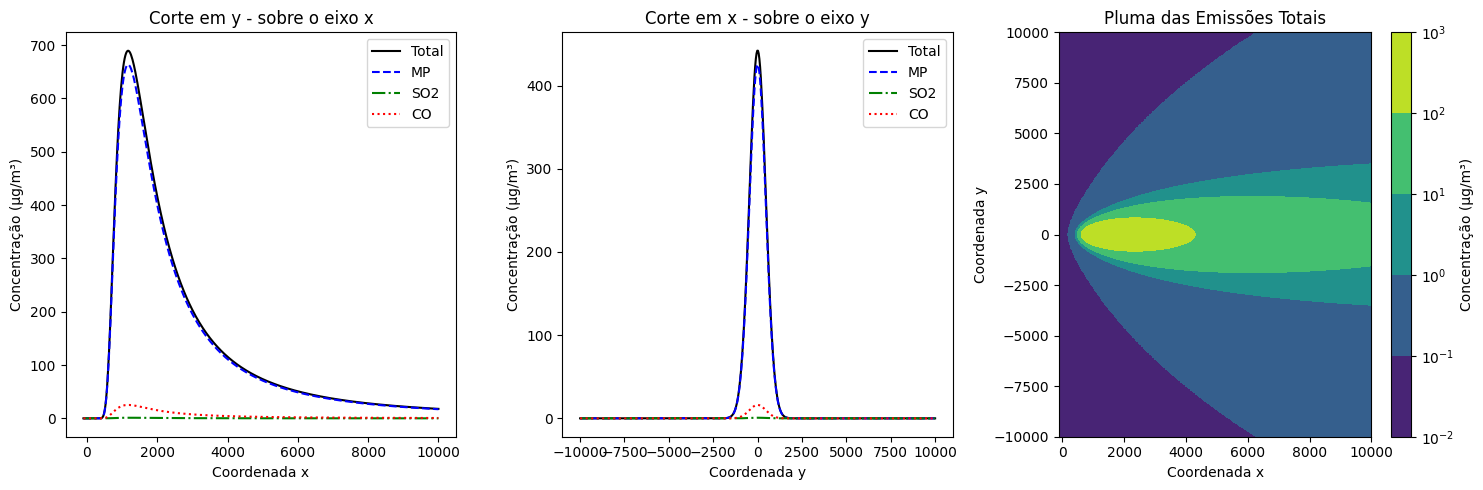

In [192]:
# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'A'
urbOrRural = 'urbano'
hg = 50  # m altura geométrica da chaminé
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
u = df_expandido.Veloc_Vento[4835]  # m/s velocidade do vento retirado da linha no df_expandido que teve maiores concentrações para classe A
y_estimado = 0  # estimando na direção do vento
z = 1.5  # altura do receptor
d = 2  # diâmetro da chaminé
vs = 10  # m/s velocidade do efluente
Ts = 400  # K temperatura do gás
Tamb = 293  # K temperatura ambiente

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaYZ(classe, xx, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,classe,u)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')


print('Altura efetiva (H) é = ' + str(hef))
print ('A classe é ' + str(classe))

# Calculando as concentrações individuais de poluentes
conc_MP = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, yy, z, hef)
conc_SO2 = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, yy, z, hef)
conc_CO = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, yy, z, hef)

# Calculando a concentração total de poluentes
conc_total = conc_MP + conc_SO2 + conc_CO

# Visualização dos resultados no espaço
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Corte em y - sobre o eixo x
ax1.plot(x, conc_total[250, :], label='Total', linestyle='-', color='black')
ax1.plot(x, conc_MP[250, :], label='MP', linestyle='--', color='blue')
ax1.plot(x, conc_SO2[250, :], label='SO2', linestyle='-.', color='green')
ax1.plot(x, conc_CO[250, :], label='CO', linestyle=':', color='red')
ax1.set_title('Corte em y - sobre o eixo x')
ax1.set_xlabel('Coordenada x')
ax1.set_ylabel('Concentração (µg/m³)')
ax1.legend()

# Gráfico 2: Corte em x - sobre o eixo y
ax2.plot(yy[:, 100], conc_total[:, 100], label='Total', linestyle='-', color='black')
ax2.plot(yy[:, 100], conc_MP[:, 100], label='MP', linestyle='--', color='blue')
ax2.plot(yy[:, 100], conc_SO2[:, 100], label='SO2', linestyle='-.', color='green')
ax2.plot(yy[:, 100], conc_CO[:, 100], label='CO', linestyle=':', color='red')
ax2.set_title('Corte em x - sobre o eixo y')
ax2.set_xlabel('Coordenada y')
ax2.set_ylabel('Concentração (µg/m³)')
ax2.legend()

# Gráfico 3: Visualização da pluma das emissões totais
contour_total = ax3.contourf(xx, yy, conc_total + 0.1, norm=LogNorm())
ax3.set_title('Pluma das Emissões Totais')
ax3.set_xlabel('Coordenada x')
ax3.set_ylabel('Coordenada y')
plt.colorbar(contour_total, ax=ax3, label='Concentração (µg/m³)')

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()

### Simulação da Pluma - Classe B Urbano

deltaH = 497.7827254380595
A pluma subiu
Altura efetiva (H) é = 547.7827254380595
A classe é B


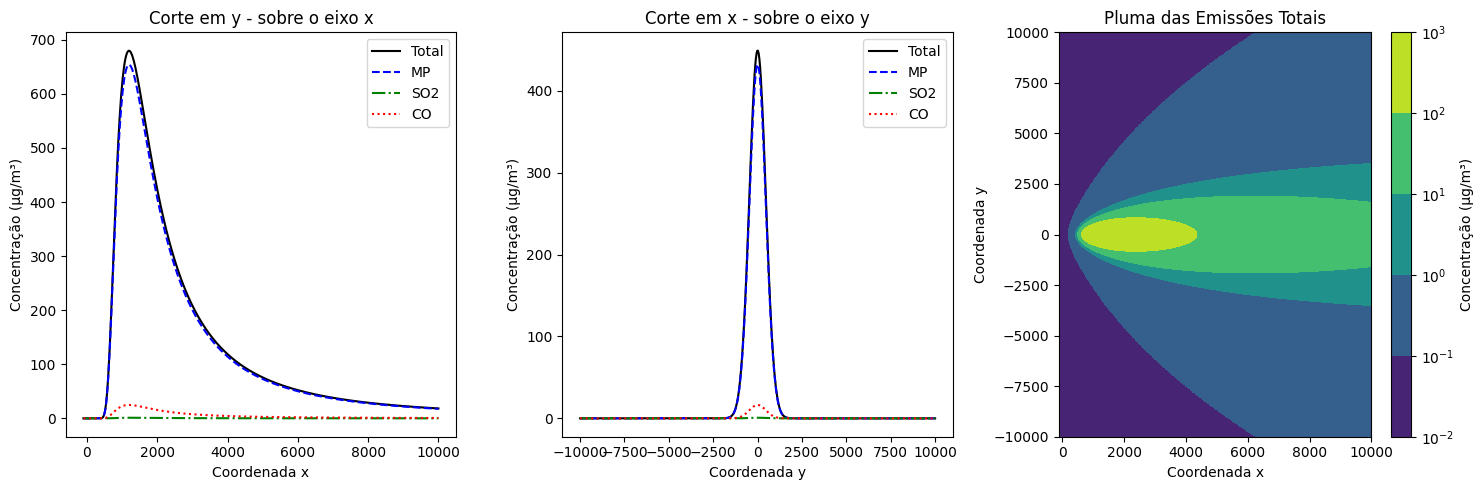

In [193]:
# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'B'
urbOrRural = 'urbano'
hg = 50  # m altura geométrica da chaminé
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
u = df_expandido.Veloc_Vento[6325]  # m/s velocidade do vento retirado da linha no df_expandido que teve maiores concentrações para classe B
y_estimado = 0  # estimando na direção do vento
z = 1.5  # altura do receptor
d = 2  # diâmetro da chaminé
vs = 10  # m/s velocidade do efluente
Ts = 400  # K temperatura do gás
Tamb = 293  # K temperatura ambiente

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaYZ(classe, xx, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,classe,u)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')


print('Altura efetiva (H) é = ' + str(hef))
print ('A classe é ' + str(classe))

# Calculando as concentrações individuais de poluentes
conc_MP = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, yy, z, hef)
conc_SO2 = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, yy, z, hef)
conc_CO = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, yy, z, hef)

# Calculando a concentração total de poluentes
conc_total = conc_MP + conc_SO2 + conc_CO

# Visualização dos resultados no espaço
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Corte em y - sobre o eixo x
ax1.plot(x, conc_total[250, :], label='Total', linestyle='-', color='black')
ax1.plot(x, conc_MP[250, :], label='MP', linestyle='--', color='blue')
ax1.plot(x, conc_SO2[250, :], label='SO2', linestyle='-.', color='green')
ax1.plot(x, conc_CO[250, :], label='CO', linestyle=':', color='red')
ax1.set_title('Corte em y - sobre o eixo x')
ax1.set_xlabel('Coordenada x')
ax1.set_ylabel('Concentração (µg/m³)')
ax1.legend()

# Gráfico 2: Corte em x - sobre o eixo y
ax2.plot(yy[:, 100], conc_total[:, 100], label='Total', linestyle='-', color='black')
ax2.plot(yy[:, 100], conc_MP[:, 100], label='MP', linestyle='--', color='blue')
ax2.plot(yy[:, 100], conc_SO2[:, 100], label='SO2', linestyle='-.', color='green')
ax2.plot(yy[:, 100], conc_CO[:, 100], label='CO', linestyle=':', color='red')
ax2.set_title('Corte em x - sobre o eixo y')
ax2.set_xlabel('Coordenada y')
ax2.set_ylabel('Concentração (µg/m³)')
ax2.legend()

# Gráfico 3: Visualização da pluma das emissões totais
contour_total = ax3.contourf(xx, yy, conc_total + 0.1, norm=LogNorm())
ax3.set_title('Pluma das Emissões Totais')
ax3.set_xlabel('Coordenada x')
ax3.set_ylabel('Coordenada y')
plt.colorbar(contour_total, ax=ax3, label='Concentração (µg/m³)')

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()

### Simulação da Pluma - Classe C Urbano

deltaH = 123.17608613152201
A pluma subiu
Altura efetiva (H) é = 173.17608613152203
A classe é C


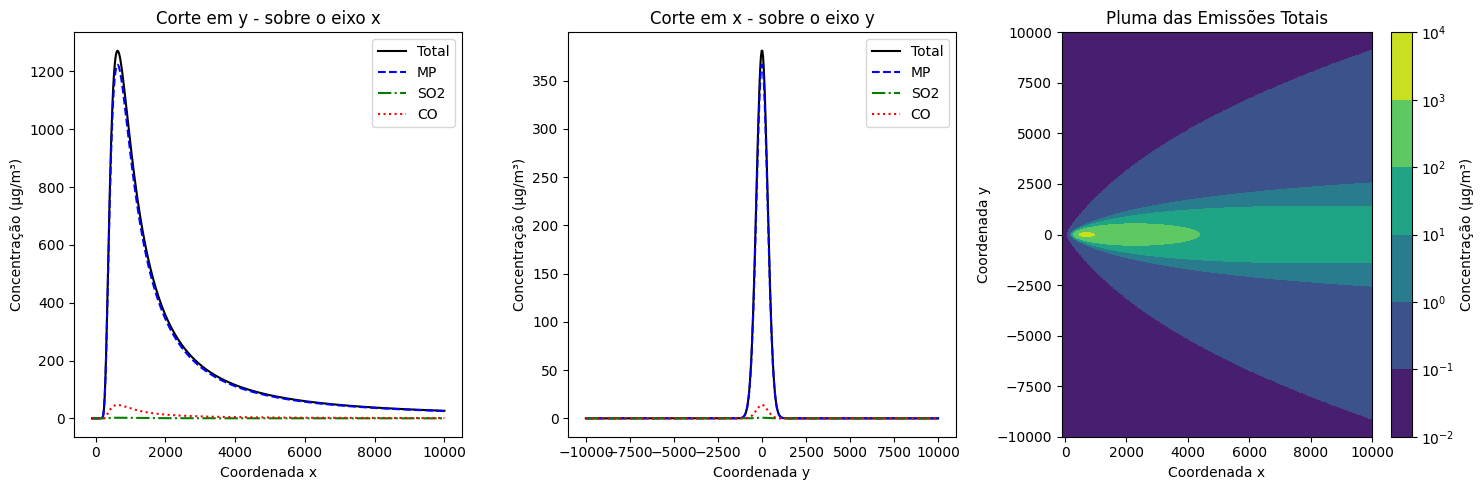

In [194]:
# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'C'
urbOrRural = 'urbano'
hg = 50  # m altura geométrica da chaminé
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
u = df_expandido.Veloc_Vento[2631]  # m/s velocidade do vento retirado da linha no df_expandido que teve maiores concentrações para classe C
y_estimado = 0  # estimando na direção do vento
z = 1.5  # altura do receptor
d = 2  # diâmetro da chaminé
vs = 10  # m/s velocidade do efluente
Ts = 400  # K temperatura do gás
Tamb = 293  # K temperatura ambiente

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaYZ(classe, xx, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,classe,u)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')


print('Altura efetiva (H) é = ' + str(hef))
print ('A classe é ' + str(classe))

# Calculando as concentrações individuais de poluentes
conc_MP = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, yy, z, hef)
conc_SO2 = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, yy, z, hef)
conc_CO = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, yy, z, hef)

# Calculando a concentração total de poluentes
conc_total = conc_MP + conc_SO2 + conc_CO

# Visualização dos resultados no espaço
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Corte em y - sobre o eixo x
ax1.plot(x, conc_total[250, :], label='Total', linestyle='-', color='black')
ax1.plot(x, conc_MP[250, :], label='MP', linestyle='--', color='blue')
ax1.plot(x, conc_SO2[250, :], label='SO2', linestyle='-.', color='green')
ax1.plot(x, conc_CO[250, :], label='CO', linestyle=':', color='red')
ax1.set_title('Corte em y - sobre o eixo x')
ax1.set_xlabel('Coordenada x')
ax1.set_ylabel('Concentração (µg/m³)')
ax1.legend()

# Gráfico 2: Corte em x - sobre o eixo y
ax2.plot(yy[:, 100], conc_total[:, 100], label='Total', linestyle='-', color='black')
ax2.plot(yy[:, 100], conc_MP[:, 100], label='MP', linestyle='--', color='blue')
ax2.plot(yy[:, 100], conc_SO2[:, 100], label='SO2', linestyle='-.', color='green')
ax2.plot(yy[:, 100], conc_CO[:, 100], label='CO', linestyle=':', color='red')
ax2.set_title('Corte em x - sobre o eixo y')
ax2.set_xlabel('Coordenada y')
ax2.set_ylabel('Concentração (µg/m³)')
ax2.legend()

# Gráfico 3: Visualização da pluma das emissões totais
contour_total = ax3.contourf(xx, yy, conc_total + 0.1, norm=LogNorm())
ax3.set_title('Pluma das Emissões Totais')
ax3.set_xlabel('Coordenada x')
ax3.set_ylabel('Coordenada y')
plt.colorbar(contour_total, ax=ax3, label='Concentração (µg/m³)')

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()

### Simulação da Pluma - Classe D Urbano

deltaH = 138.89618290391454
A pluma subiu
Altura efetiva (H) é = 188.89618290391454
A classe é D


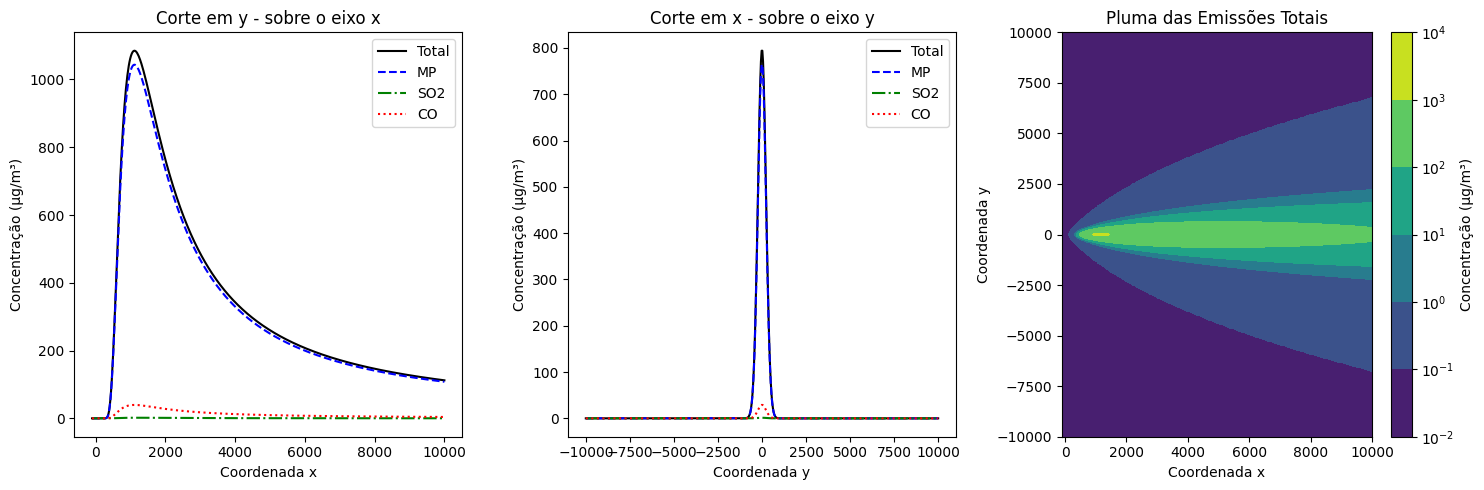

In [195]:
# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'D'
urbOrRural = 'urbano'
hg = 50  # m altura geométrica da chaminé
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
u = df_expandido.Veloc_Vento[6988]  # m/s velocidade do vento retirado da linha no df_expandido que teve maiores concentrações para classe D
y_estimado = 0  # estimando na direção do vento
z = 1.5  # altura do receptor
d = 2  # diâmetro da chaminé
vs = 10  # m/s velocidade do efluente
Ts = 400  # K temperatura do gás
Tamb = 293  # K temperatura ambiente

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaYZ(classe, xx, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,classe,u)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')


print('Altura efetiva (H) é = ' + str(hef))
print ('A classe é ' + str(classe))

# Calculando as concentrações individuais de poluentes
conc_MP = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, yy, z, hef)
conc_SO2 = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, yy, z, hef)
conc_CO = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, yy, z, hef)

# Calculando a concentração total de poluentes
conc_total = conc_MP + conc_SO2 + conc_CO

# Visualização dos resultados no espaço
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Corte em y - sobre o eixo x
ax1.plot(x, conc_total[250, :], label='Total', linestyle='-', color='black')
ax1.plot(x, conc_MP[250, :], label='MP', linestyle='--', color='blue')
ax1.plot(x, conc_SO2[250, :], label='SO2', linestyle='-.', color='green')
ax1.plot(x, conc_CO[250, :], label='CO', linestyle=':', color='red')
ax1.set_title('Corte em y - sobre o eixo x')
ax1.set_xlabel('Coordenada x')
ax1.set_ylabel('Concentração (µg/m³)')
ax1.legend()

# Gráfico 2: Corte em x - sobre o eixo y
ax2.plot(yy[:, 100], conc_total[:, 100], label='Total', linestyle='-', color='black')
ax2.plot(yy[:, 100], conc_MP[:, 100], label='MP', linestyle='--', color='blue')
ax2.plot(yy[:, 100], conc_SO2[:, 100], label='SO2', linestyle='-.', color='green')
ax2.plot(yy[:, 100], conc_CO[:, 100], label='CO', linestyle=':', color='red')
ax2.set_title('Corte em x - sobre o eixo y')
ax2.set_xlabel('Coordenada y')
ax2.set_ylabel('Concentração (µg/m³)')
ax2.legend()

# Gráfico 3: Visualização da pluma das emissões totais
contour_total = ax3.contourf(xx, yy, conc_total + 0.1, norm=LogNorm())
ax3.set_title('Pluma das Emissões Totais')
ax3.set_xlabel('Coordenada x')
ax3.set_ylabel('Coordenada y')
plt.colorbar(contour_total, ax=ax3, label='Concentração (µg/m³)')

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()

### Simulação da Pluma - Classe E Urbano

deltaH = 77.49488791599745
A pluma subiu
Altura efetiva (H) é = 127.49488791599745
A classe é E


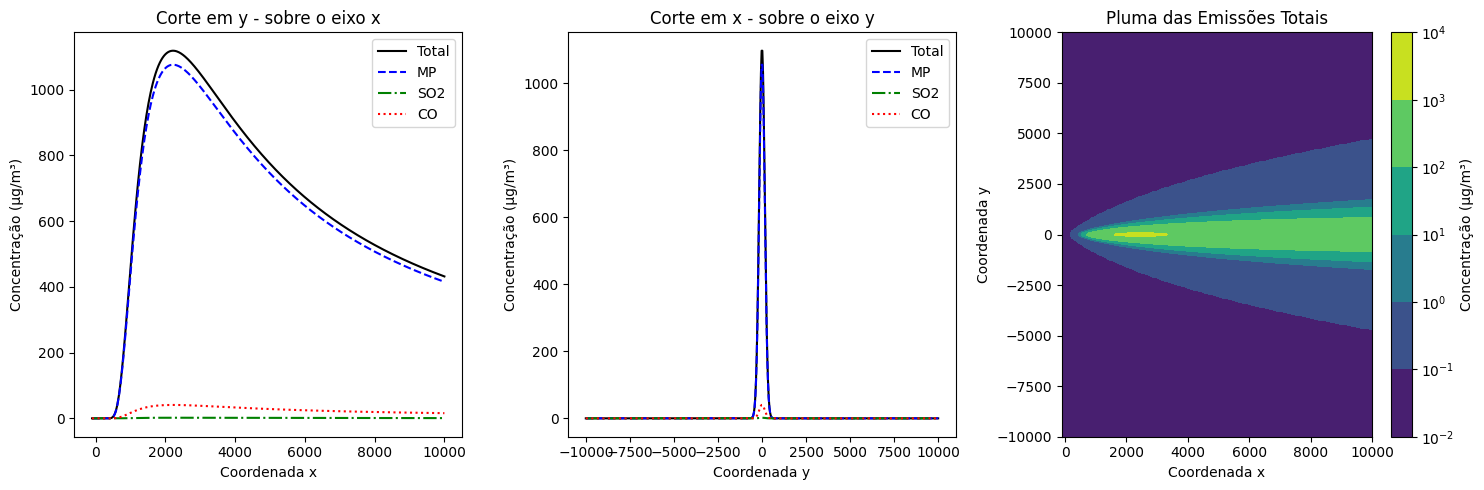

In [196]:
# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'E'
urbOrRural = 'urbano'
hg = 50  # m altura geométrica da chaminé
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
u = df_expandido.Veloc_Vento[1268]  # m/s velocidade do vento retirado da linha no df_expandido que teve maiores concentrações para classe E
y_estimado = 0  # estimando na direção do vento
z = 1.5  # altura do receptor
d = 2  # diâmetro da chaminé
vs = 10  # m/s velocidade do efluente
Ts = 400  # K temperatura do gás
Tamb = 293  # K temperatura ambiente

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaYZ(classe, xx, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,classe,u)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')


print('Altura efetiva (H) é = ' + str(hef))
print ('A classe é ' + str(classe))

# Calculando as concentrações individuais de poluentes
conc_MP = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, yy, z, hef)
conc_SO2 = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, yy, z, hef)
conc_CO = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, yy, z, hef)

# Calculando a concentração total de poluentes
conc_total = conc_MP + conc_SO2 + conc_CO

# Visualização dos resultados no espaço
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Corte em y - sobre o eixo x
ax1.plot(x, conc_total[250, :], label='Total', linestyle='-', color='black')
ax1.plot(x, conc_MP[250, :], label='MP', linestyle='--', color='blue')
ax1.plot(x, conc_SO2[250, :], label='SO2', linestyle='-.', color='green')
ax1.plot(x, conc_CO[250, :], label='CO', linestyle=':', color='red')
ax1.set_title('Corte em y - sobre o eixo x')
ax1.set_xlabel('Coordenada x')
ax1.set_ylabel('Concentração (µg/m³)')
ax1.legend()

# Gráfico 2: Corte em x - sobre o eixo y
ax2.plot(yy[:, 100], conc_total[:, 100], label='Total', linestyle='-', color='black')
ax2.plot(yy[:, 100], conc_MP[:, 100], label='MP', linestyle='--', color='blue')
ax2.plot(yy[:, 100], conc_SO2[:, 100], label='SO2', linestyle='-.', color='green')
ax2.plot(yy[:, 100], conc_CO[:, 100], label='CO', linestyle=':', color='red')
ax2.set_title('Corte em x - sobre o eixo y')
ax2.set_xlabel('Coordenada y')
ax2.set_ylabel('Concentração (µg/m³)')
ax2.legend()

# Gráfico 3: Visualização da pluma das emissões totais
contour_total = ax3.contourf(xx, yy, conc_total + 0.1, norm=LogNorm())
ax3.set_title('Pluma das Emissões Totais')
ax3.set_xlabel('Coordenada x')
ax3.set_ylabel('Coordenada y')
plt.colorbar(contour_total, ax=ax3, label='Concentração (µg/m³)')

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()

### Simulação da Pluma - Classe F Urbano

deltaH = 56.65752227669196
A pluma subiu
Altura efetiva (H) é = 106.65752227669196
A classe é F


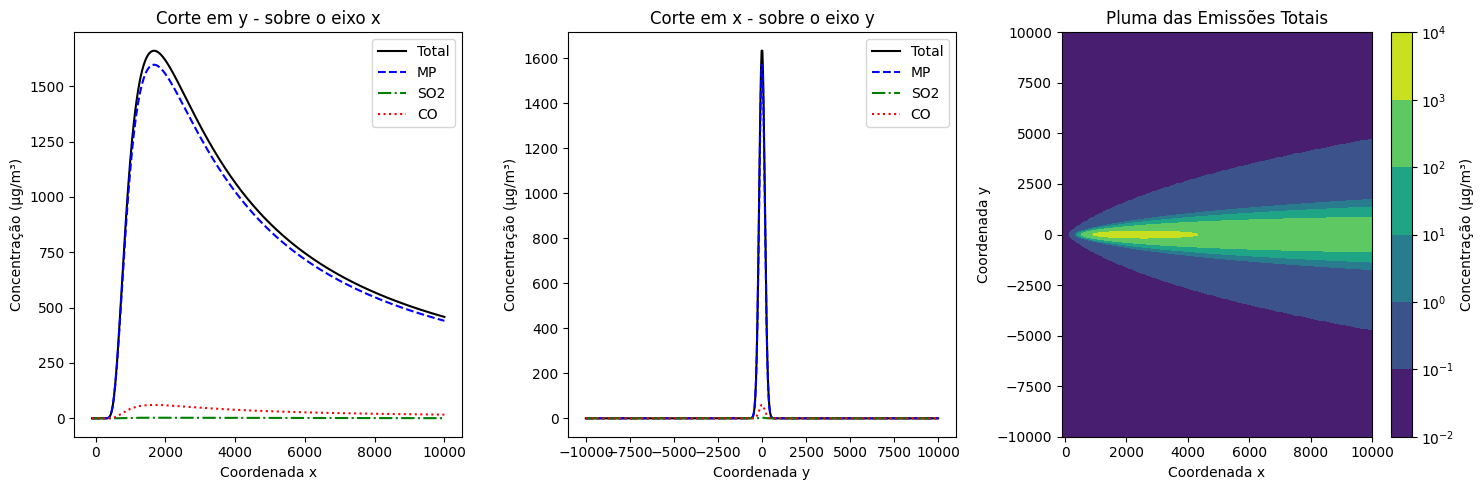

In [201]:
# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'F'
urbOrRural = 'urbano'
hg = 50  # m altura geométrica da chaminé
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
u = df_expandido.Veloc_Vento[3891]  # m/s velocidade do vento retirado da linha no df_expandido que teve maiores concentrações para classe F
y_estimado = 0  # estimando na direção do vento
z = 1.5  # altura do receptor
d = 2  # diâmetro da chaminé
vs = 10  # m/s velocidade do efluente
Ts = 400  # K temperatura do gás
Tamb = 293  # K temperatura ambiente

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaYZ(classe, xx, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,classe,u)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')


print('Altura efetiva (H) é = ' + str(hef))
print ('A classe é ' + str(classe))

# Calculando as concentrações individuais de poluentes
conc_MP = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, yy, z, hef)
conc_SO2 = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, yy, z, hef)
conc_CO = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, yy, z, hef)

# Calculando a concentração total de poluentes
conc_total = conc_MP + conc_SO2 + conc_CO

# Visualização dos resultados no espaço
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Corte em y - sobre o eixo x
ax1.plot(x, conc_total[250, :], label='Total', linestyle='-', color='black')
ax1.plot(x, conc_MP[250, :], label='MP', linestyle='--', color='blue')
ax1.plot(x, conc_SO2[250, :], label='SO2', linestyle='-.', color='green')
ax1.plot(x, conc_CO[250, :], label='CO', linestyle=':', color='red')
ax1.set_title('Corte em y - sobre o eixo x')
ax1.set_xlabel('Coordenada x')
ax1.set_ylabel('Concentração (µg/m³)')
ax1.legend()

# Gráfico 2: Corte em x - sobre o eixo y
ax2.plot(yy[:, 100], conc_total[:, 100], label='Total', linestyle='-', color='black')
ax2.plot(yy[:, 100], conc_MP[:, 100], label='MP', linestyle='--', color='blue')
ax2.plot(yy[:, 100], conc_SO2[:, 100], label='SO2', linestyle='-.', color='green')
ax2.plot(yy[:, 100], conc_CO[:, 100], label='CO', linestyle=':', color='red')
ax2.set_title('Corte em x - sobre o eixo y')
ax2.set_xlabel('Coordenada y')
ax2.set_ylabel('Concentração (µg/m³)')
ax2.legend()

# Gráfico 3: Visualização da pluma das emissões totais
contour_total = ax3.contourf(xx, yy, conc_total + 0.1, norm=LogNorm())
ax3.set_title('Pluma das Emissões Totais')
ax3.set_xlabel('Coordenada x')
ax3.set_ylabel('Coordenada y')
plt.colorbar(contour_total, ax=ax3, label='Concentração (µg/m³)')

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()